In [1]:
import sys
sys.path.append('/home/swang597/Documents/Research/Project_heightmap/Utility_projHM')

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
import os
import numpy as np
# import tqdm
# import torchvision
# from torchvision import datasets, models, transforms
# import copy

# from sklearn.model_selection import train_test_split
# from sklearn.datasets import fetch_california_housing
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

from datetime import date
# from model_3e3d import UNet_3e3d_Img, UNet_3e3d_Vec, UNet_CNN3e3d_2I_1V, UNet_CNN3e3d_2I_1V_lin2
import model_3e3d as mymodel
import glob

# torch.manual_seed(1)
np.random.seed(1)

In [2]:
# # fix Vx and fix Wy
# # foldername_SCM =   '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000noHM/'
# foldername_SCM =   '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_SCM_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# foldername_Hyb_0TerrF = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb_0TerrF_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'


In [3]:
# # fix Wy
# # foldername_SCM =   '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_SCM_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# # foldername_Hyb_0TerrF = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb_0TerrF_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# # foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_logScale_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'

# # initX=-8 # training data
# # foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-8.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX-8.000000terrH-1.000000normLoad1000.000000/'

# # # initX= 4 training data
# # foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX4.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX4.000000terrH-1.000000normLoad1000.000000/'

# # initX= -23, 3 test traj, -18 training traj
# # initX= -18
# # foldername_SCM = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

# # initX= 4
# # foldername_SCM = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNIGeoI/DEMO_OUTPUT/Hybrid_fixW_NNFGeoI_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

# # 
# foldername_SCM_HM = foldername_SCM[:-1] + '_HMbmp/'
# foldername_Hyb_HM = foldername_Hyb[:-1] + '_HMbmp/'
# filename_SCM = foldername_SCM + 'SCM_force_saved.txt'
# filename_Hyb = foldername_Hyb + 'SCM_force_saved.txt'
# # filename_Hyb_0TerrF = foldername_Hyb_0TerrF + 'SCM_force_saved.txt'
# filename_SCM_wheelstate = foldername_SCM + 'ROVER_states_saved.txt'
# filename_Hyb_wheelstate = foldername_Hyb + 'ROVER_states_saved.txt'

# filename_SCM_force = foldername_SCM + 'SCM_force_saved.txt'
# filename_Hyb_force = foldername_Hyb + 'SCM_force_saved.txt'

# # data_SCM = np.loadtxt(filename_SCM)
# # data_SCM_Hyb = np.loadtxt(filename_Hyb)
# # data_SCM_Hyb_0TerrF = np.loadtxt(filename_Hyb_0TerrF)
# data_SCM_wheelstate = np.loadtxt(filename_SCM_wheelstate)
# data_Hyb_wheelstate = np.loadtxt(filename_Hyb_wheelstate)

# data_SCM_force = np.loadtxt(filename_SCM_force)
# data_Hyb_force = np.loadtxt(filename_Hyb_force)

# # print(data_SCM.shape)

In [4]:
# fix Wy
# foldername_SCM =   '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_SCM_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'
# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'
# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# foldername_Hyb_0TerrF = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb_0TerrF_HM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_ML_TIRE_TEST_RIG_switchTerr_0TerrF_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000_HMbmp/'

# foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# # foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_logScale_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000normLoad1000.000000/'

# initX=-8 # training data
# foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX-8.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX-8.000000terrH-1.000000normLoad1000.000000/'

# # initX= 4 training data
# foldername_SCM = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX4.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_expScale_dt0.000500_terrGrid0.005000terrX4.000000terrH-1.000000normLoad1000.000000/'

# initX= -23, 3 test traj, -18 training traj
# initX= -18
# foldername_SCM = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM/DEMO_OUTPUT/SCM_fixW_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'
# foldername_Hyb = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

initX= 4
foldername_SCM = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNFGeoI/DEMO_OUTPUT/Hybrid_fixW_NNFGeoI_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1200.000000_SCM2MLSwitch1000000.000000/'
foldername_Hyb = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNFGeoI/DEMO_OUTPUT/Hybrid_fixW_NNFGeoI_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1200.000000_SCM2MLSwitch1.500000/'

# 
foldername_SCM_HM = foldername_SCM[:-1] + '_HMbmp/'
foldername_Hyb_HM = foldername_Hyb[:-1] + '_HMbmp/'
filename_SCM = foldername_SCM + 'SCM_force_saved.txt'
filename_Hyb = foldername_Hyb + 'SCM_force_saved.txt'
# filename_Hyb_0TerrF = foldername_Hyb_0TerrF + 'SCM_force_saved.txt'
filename_SCM_wheelstate = foldername_SCM + 'ROVER_states_saved.txt'
filename_Hyb_wheelstate = foldername_Hyb + 'ROVER_states_saved.txt'

filename_SCM_force = foldername_SCM + 'SCM_force_saved.txt'
filename_Hyb_force = foldername_Hyb + 'SCM_force_saved.txt'

# data_SCM = np.loadtxt(filename_SCM)
# data_SCM_Hyb = np.loadtxt(filename_Hyb)
# data_SCM_Hyb_0TerrF = np.loadtxt(filename_Hyb_0TerrF)
data_SCM_wheelstate = np.loadtxt(filename_SCM_wheelstate)
data_Hyb_wheelstate = np.loadtxt(filename_Hyb_wheelstate)

data_SCM_force = np.loadtxt(filename_SCM_force)
data_Hyb_force = np.loadtxt(filename_Hyb_force)

# print(data_SCM.shape)

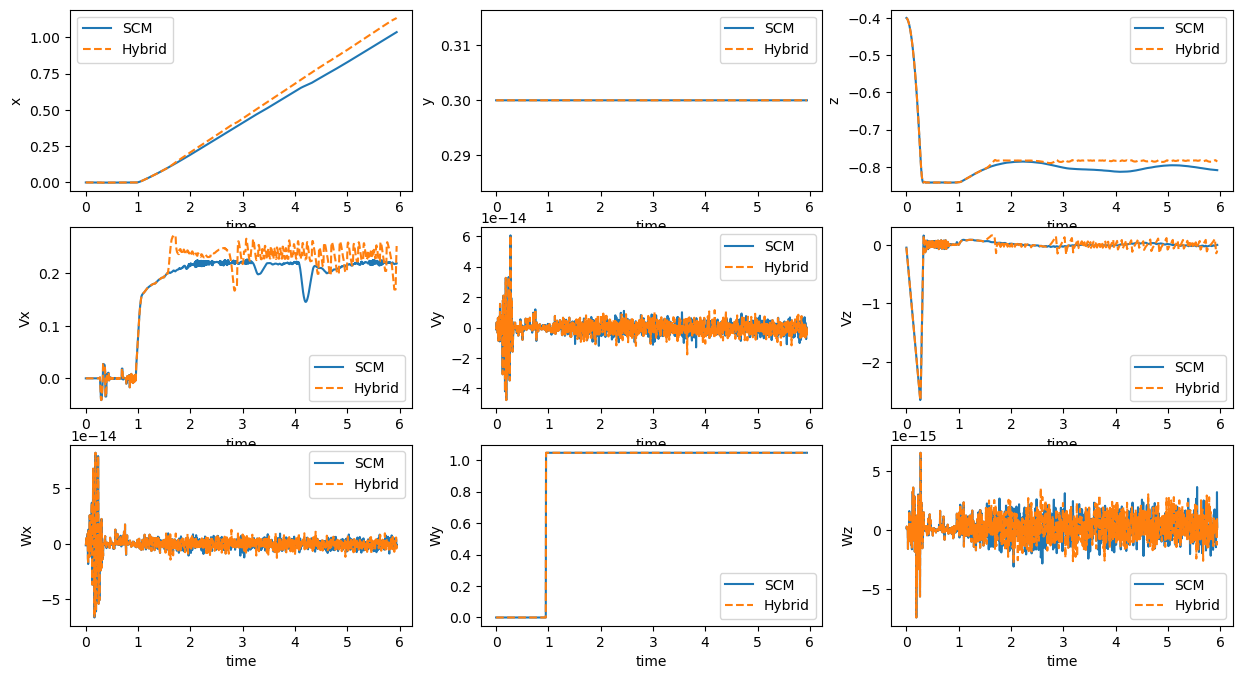

In [5]:
# plot wheel state
ylabel_list = ['x','y','z','Vx', 'Vy', 'Vz', 'Wx', 'Wy', 'Wz']
idx_list = [    1,2,3,      8,9,10,           11,12,13]

fig, ax = plt.subplots(3, 3, figsize=(5*3, 8))
for iax in range(len(ylabel_list)):
    ax[iax//3, iax%3].plot(data_SCM_wheelstate[:, 0], data_SCM_wheelstate[:, idx_list[iax]],label='SCM')
    ax[iax//3, iax%3].plot(data_Hyb_wheelstate[:, 0], data_Hyb_wheelstate[:, idx_list[iax]], label='Hybrid',linestyle='--')
    # ax[iax//3, iax%3].plot(data_SCM_Hyb_0TerrF[:, 0], data_SCM_Hyb_0TerrF[:, iax+1], label='SCM_Hyb_0TerrF',linestyle=':')
    ax[iax//3, iax%3].set_xlabel('time')
    ax[iax//3, iax%3].set_ylabel(ylabel_list[iax])
    ax[iax//3, iax%3].legend()


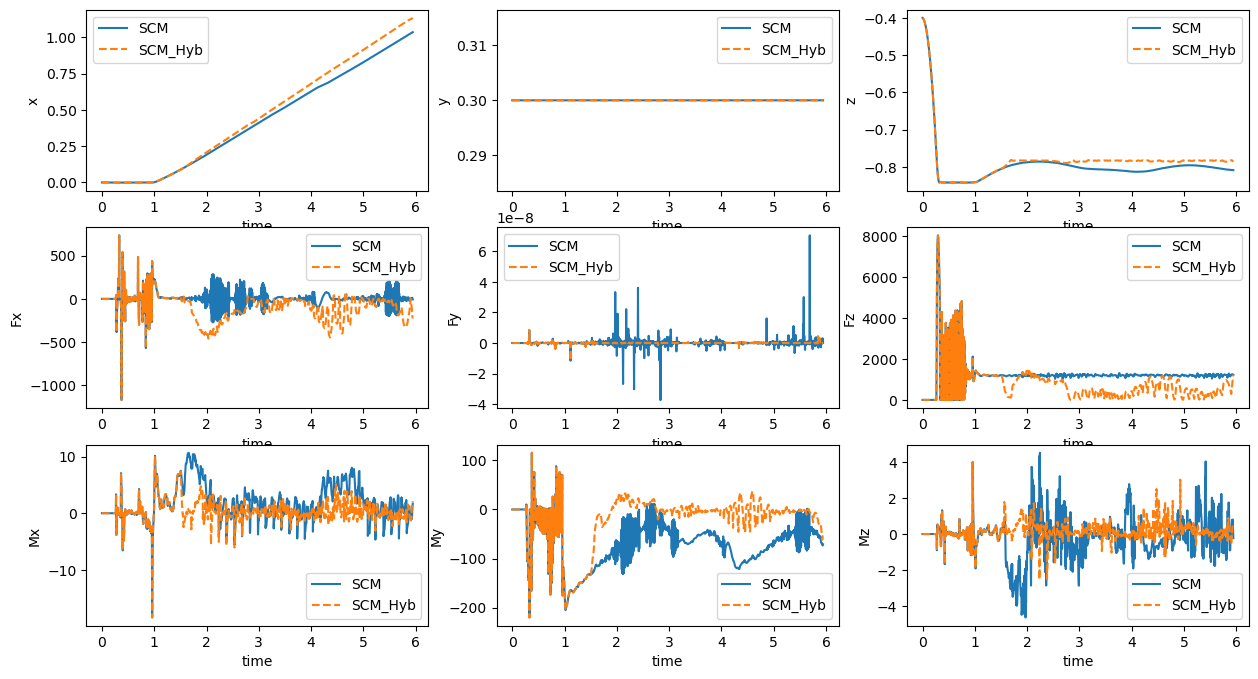

In [6]:
# plot the data with respect to time as subplot
F_list = ['x','y','z','Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']
fig, ax = plt.subplots(3, 3, figsize=(5*3, 8))
for iax in range(len(F_list)):
    ax[iax//3, iax%3].plot(data_SCM_force[:, 0], data_SCM_force[:, iax+1], label='SCM')
    ax[iax//3, iax%3].plot(data_Hyb_force[:, 0], data_Hyb_force[:, iax+1], label='SCM_Hyb',linestyle='--')
    # ax[iax//3, iax%3].plot(data_SCM_Hyb_0TerrF[:, 0], data_SCM_Hyb_0TerrF[:, iax+1], label='SCM_Hyb_0TerrF',linestyle=':')
    ax[iax//3, iax%3].set_xlabel('time')
    ax[iax//3, iax%3].set_ylabel(F_list[iax])
    ax[iax//3, iax%3].legend()


In [7]:
# # find at which index data_SCM[:,1] > 1.0
# # idx = np.where(data_SCM[:,1] > 1.0)[0][0]
# # print('idx = ', idx, 'x=', data_SCM[idx,1],'time = ', data_SCM[idx,0])
# # find at which index data_SCM[:,0] > 1.5
# idx = np.where(data_SCM[:,0] >= 1.5)[0][0]
# print('idx = ', idx, 'time = ', data_SCM[idx,0], 'x=', data_SCM[idx,1])
# print('idx-1 = ', idx-1, 'time = ', data_SCM[idx-1,0], 'x=', data_SCM[idx-1,1])

(1179, 3)
(0,)


(-200.0, 100.0)

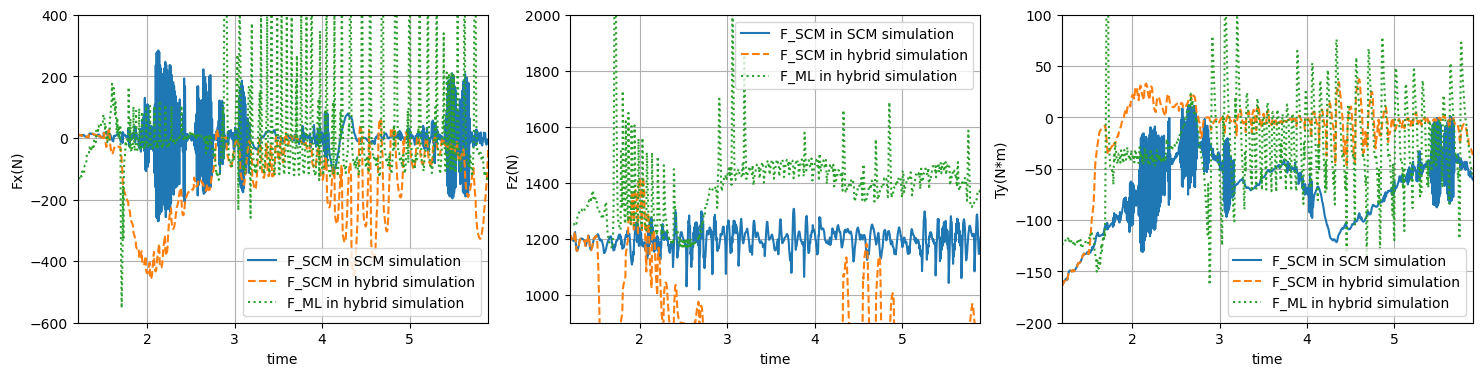

In [8]:
time_tot =5.9# 10.9 #2.95 #1.51#
dt = 5e-4
dump_dt = dt*10
F_Hyb, time_Hyb = [], []
F_Hyb_0TerrF = []
for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_F = foldername_Hyb_HM + f'F_t{itime:6f}.txt'
    data = np.loadtxt(filename_F)
    # print(data)
    if any(np.isnan(data)):
        continue
    F_Hyb.append(data)
    time_Hyb.append(itime)
    # data_0TerrF = np.loadtxt(foldername_Hyb_0TerrF_HM + f'F_t{itime:6f}.txt')
    # F_Hyb_0TerrF.append(data_0TerrF)
    
F_Hyb = np.array(F_Hyb)
time_Hyb = np.array(time_Hyb)
F_Hyb_0TerrF = np.array(F_Hyb_0TerrF)
print(F_Hyb.shape)
print(F_Hyb_0TerrF.shape)

# polt time_Hyb vs F_Hyb
F_list_Hmap = ['Fx(N)', 'Fz(N)', 'Ty(N*m)']
F_SCM_idx = [4, 6, 8]
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(F_list_Hmap)):
    ax[iax].plot(data_SCM_force[:, 0], data_SCM_force[:, F_SCM_idx[iax]], label='F_SCM in SCM simulation')
    ax[iax].plot(data_Hyb_force[:, 0], data_Hyb_force[:, F_SCM_idx[iax]],linestyle='--', label='F_SCM in hybrid simulation')
    ax[iax].plot(time_Hyb, F_Hyb[:, iax], linestyle=':',label='F_ML in hybrid simulation')
    # ax[iax].plot(time_Hyb, F_Hyb_0TerrF[:, iax], label='ML_0TerrF',linestyle='-.')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(F_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()
    ax[iax].set_xlim(1.2, time_Hyb[-1])
ax[0].set_ylim(-600, 400)
ax[1].set_ylim(900, 2000)
ax[2].set_ylim(-200, 100)


(1179, 3)


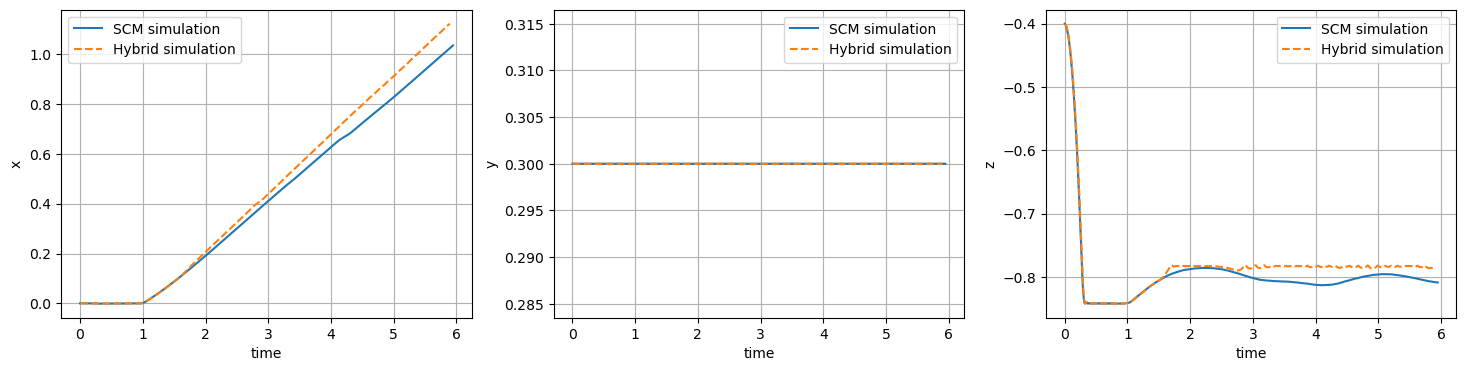

In [9]:
X_Hyb, time_Hyb = [], []
for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_X = foldername_Hyb_HM + f'xyz_t{itime:6f}.txt'
    data = np.loadtxt(filename_X)
    # print(data)
    if any(np.isnan(data)):
        continue
    X_Hyb.append(data)
    time_Hyb.append(itime)
X_Hyb = np.array(X_Hyb)
time_Hyb = np.array(time_Hyb)
print(X_Hyb.shape)

# polt time_Hyb vs F_Hyb
X_list_Hmap = ['x', 'y', 'z']
F_SCM_idx = [1,2,3]
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(X_list_Hmap)):
    ax[iax].plot(data_SCM_force[:, 0], data_SCM_force[:, F_SCM_idx[iax]], label='SCM simulation')
    ax[iax].plot(time_Hyb, X_Hyb[:, iax], linestyle='--', label='Hybrid simulation')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(X_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(1.2, 3)
# ax[0].set_ylim(-600, 100)
# ax[1].set_ylim(0.3-1e-4, 0.301)
# ax[2].set_ylim(-0.84,-0.8)



(1179, 3)
(1179, 3)


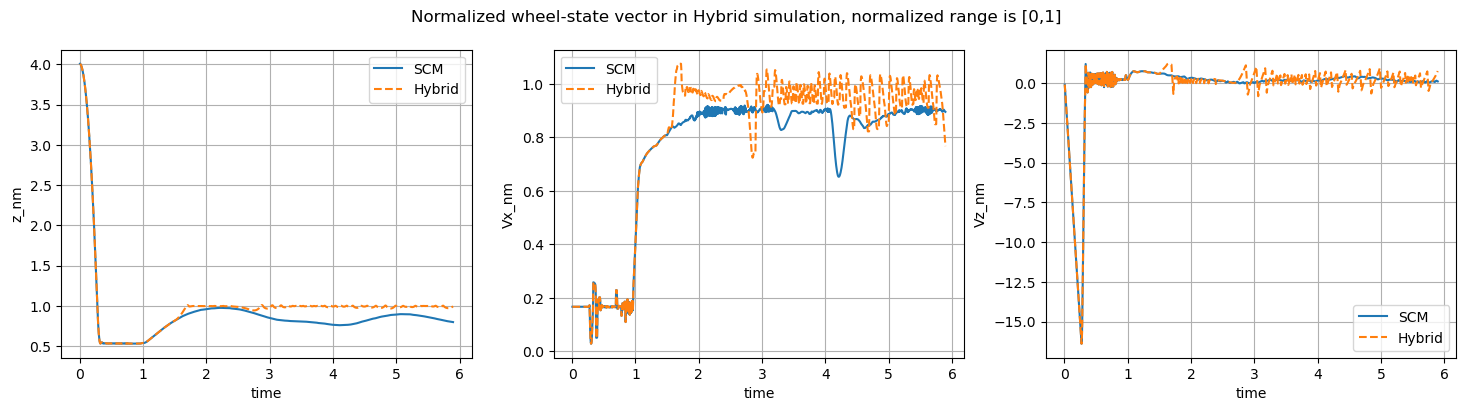

In [10]:
Vecnm_hyb, time_hyb = [], []
Vecnm_SCM, time_SCM = [], []
F_SCM = []

for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_Vecnm_hyb = foldername_Hyb_HM + f'Vecnm_t{itime:6f}.txt'
    data_Hyb_i = np.loadtxt(filename_Vecnm_hyb)
    # print(data)
    if any(np.isnan(data_Hyb_i)):
        continue
    Vecnm_hyb.append(data_Hyb_i)
    time_hyb.append(itime)

    filename_Vecnm_SCM = foldername_SCM_HM + f'Vecnm_t{itime:6f}.txt'
    data_SCM_i = np.loadtxt(filename_Vecnm_SCM)
    # print(data)
    if any(np.isnan(data_SCM_i)):
        continue
    Vecnm_SCM.append(data_SCM_i)
    time_SCM.append(itime)

    filename_F_SCM = foldername_SCM_HM + f'F_t{itime:6f}.txt'
    data_SCM_i = np.loadtxt(filename_F_SCM)
    # print(data)
    if any(np.isnan(data_SCM_i)):
        continue
    F_SCM.append(data_SCM_i)



Vecnm_hyb = np.array(Vecnm_hyb)
time_hyb = np.array(time_Hyb)
Vecnm_SCM = np.array(Vecnm_SCM)
time_SCM = np.array(time_SCM)
F_SCM = np.array(F_SCM)
print(Vecnm_hyb.shape)

# polt time_Hyb vs F_Hyb
Vecnm_hyb_list = ['z_nm', 'Vx_nm', 'Vz_nm']
fig, ax = plt.subplots(1, len(Vecnm_hyb_list), figsize=(18, 4))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_SCM, Vecnm_SCM[:, iax], label='SCM')    
    ax[iax].plot(time_hyb, Vecnm_hyb[:, iax], linestyle='--', label='Hybrid')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(0, data_SCM[-1,0])
print(F_SCM.shape)


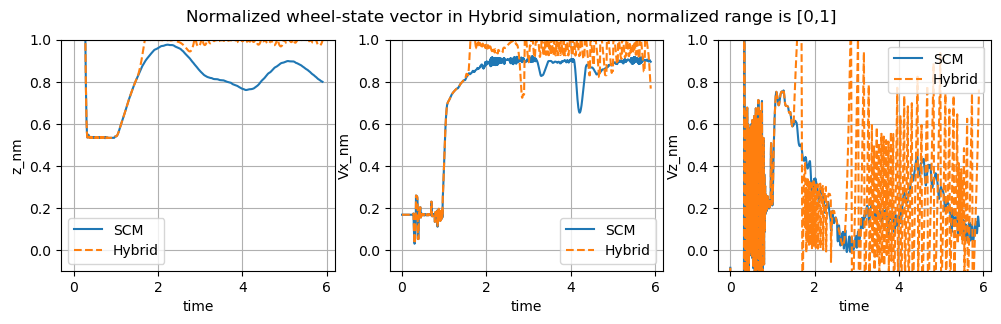

In [11]:
Vecnm_hyb_list = ['z_nm', 'Vx_nm','Vz_nm']
Vecnm_hyb_list_idx = [0, 1, 2]
fig, ax = plt.subplots(1, len(Vecnm_hyb_list), figsize=(12, 3))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_hyb, Vecnm_SCM[:, Vecnm_hyb_list_idx[iax]], linestyle='-', label='SCM')
    ax[iax].plot(time_hyb, Vecnm_hyb[:, Vecnm_hyb_list_idx[iax]], linestyle='--', label='Hybrid')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()

    ax[iax].set_ylim(-0.1, 1)
    ax[iax].grid()


In [12]:
# find at which index Vecnm_hyb[:,1] != Vecnm_SCM[:,1]
idx = np.where(Vecnm_hyb[:,1] != Vecnm_SCM[:,1])
print('idx = ', idx, 'time = ', time_hyb[idx], 'Vecnm_hyb = ', Vecnm_hyb[idx,1], 'Vecnm_SCM = ', Vecnm_SCM[idx,1])

idx =  (array([ 301,  302,  303,  304,  305,  306,  307,  308,  309,  310,  311,
        312,  313,  314,  315,  316,  317,  318,  319,  320,  321,  322,
        323,  324,  325,  326,  327,  328,  329,  330,  331,  332,  333,
        334,  335,  336,  337,  338,  339,  340,  341,  342,  343,  344,
        345,  346,  347,  348,  349,  350,  351,  352,  353,  354,  355,
        356,  357,  358,  359,  360,  361,  362,  363,  364,  365,  366,
        367,  368,  369,  370,  371,  372,  373,  374,  375,  376,  377,
        378,  379,  380,  381,  382,  383,  384,  385,  386,  387,  388,
        389,  390,  391,  392,  393,  394,  395,  396,  397,  398,  399,
        400,  401,  402,  403,  404,  405,  406,  407,  408,  409,  410,
        411,  412,  413,  414,  415,  416,  417,  418,  419,  420,  421,
        422,  423,  424,  425,  426,  427,  428,  429,  430,  431,  432,
        433,  434,  435,  436,  437,  438,  439,  440,  441,  442,  443,
        444,  445,  446,  447,  448,  449, 

IndexError: index 2 is out of bounds for axis 0 with size 2

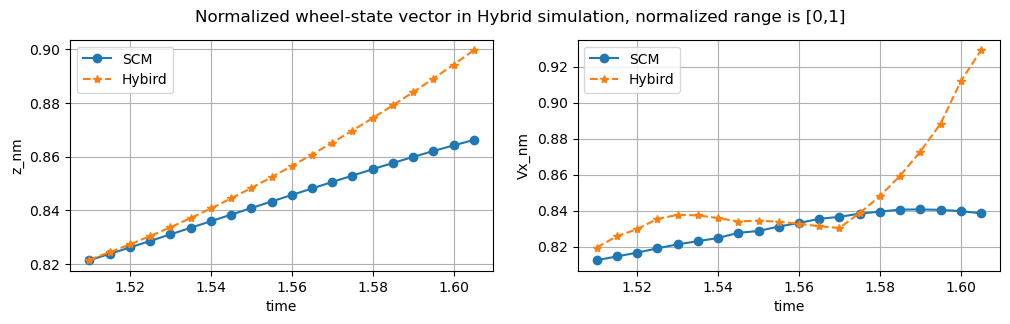

In [13]:
# find the row idx where the difference is larger than 1e-4
# idx_diff_z = np.where(abs(Vecnm_hyb[:,0] - Vecnm_SCM[:,0]) > 1e-4)[0]
# idx_diff_vz = np.where(abs(Vecnm_hyb[:,2] - Vecnm_SCM[:,2]) > 1e-4)[0]
# # print(idx_diff_z, idx_diff_vz)
# idx_diff = set(idx_diff_z).union(set(idx_diff_vz))
idx_diff = np.union1d(np.where(abs(Vecnm_hyb[:,0] - Vecnm_SCM[:,0]) > 1e-4)[0], np.where(abs(Vecnm_hyb[:,2] - Vecnm_SCM[:,2]) > 1e-4)[0])
# print(idx_diff)
plot_idx = idx_diff[:20]
# print('plot_idx = ', plot_idx)
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_hyb[plot_idx], Vecnm_SCM[plot_idx, Vecnm_hyb_list_idx[iax]], linestyle='-', marker='o', label='SCM')
    ax[iax].plot(time_hyb[plot_idx], Vecnm_hyb[plot_idx, Vecnm_hyb_list_idx[iax]], linestyle='--', marker='*',label='Hybird')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(1, 3)
    # ax[iax].set_ylim(-1, 1)



(1179, 3)


NameError: name 'data_SCM_Hyb' is not defined

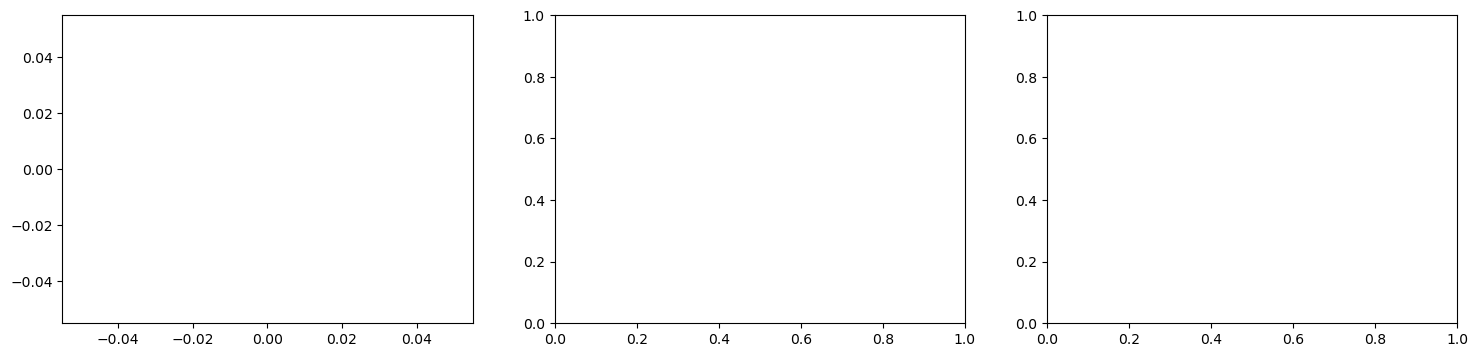

In [ ]:
# print(data_SCM_Hyb.shape)
print(F_Hyb.shape)
F_SCM_idx = [4, 6, 8]
idx_start, idx_end = plot_idx[0]-50,plot_idx[0]+20
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(F_list_Hmap)):
    ax[iax].plot(data_SCM[idx_start:idx_end, 0], data_SCM[idx_start:idx_end, F_SCM_idx[iax]], label='F_SCM in SCM simulation')
    ax[iax].plot(data_SCM_Hyb[idx_start:idx_end, 0], data_SCM_Hyb[idx_start:idx_end, F_SCM_idx[iax]],linestyle='--', label='F_SCM in hybrid simulation')
    ax[iax].plot(time_Hyb[idx_start:idx_end], F_Hyb[idx_start:idx_end, iax], linestyle=':',label='F_ML in hybrid simulation')
    # ax[iax].plot(time_Hyb, F_Hyb_0TerrF[:, iax], label='ML_0TerrF',linestyle='-.')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(F_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()

In [ ]:
print(F_SCM_idx)
print(data_SCM.shape)

[4, 6, 8]
(141, 6)


In [ ]:
# plot the bmp file
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

filename_bmp = '/home/swang597/Documents/Research/chrono_fork_radu/build/data/vehicle/terrain/height_maps/terrain_heightmap_smooth_horizontal_terrGrid0.005_wx50_wy1.bmp'

# Load the image file
img = Image.open(filename_bmp)  # Make sure to replace 'path_to_your_image.bmp' with your actual file path

# Convert the image to a numpy array (optional, for manipulation if needed)
img_array = np.array(img)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Optional: This removes the axis to display only the image
plt.show()


(200, 10000)


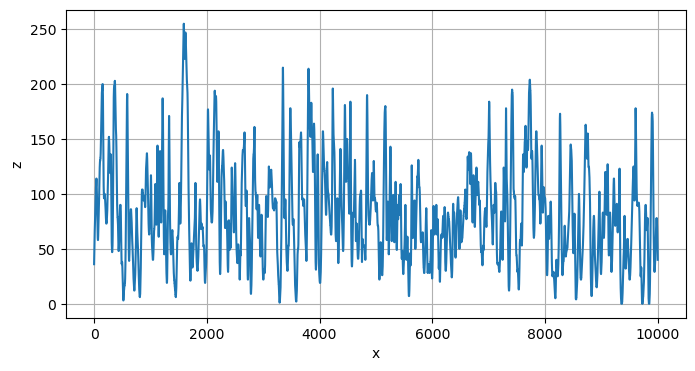

In [ ]:
img_array = np.array(img)
print(img_array.shape)
# plot the img_array[1,:]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(img_array[1,:])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.grid()
# plt.show()


In [ ]:
import cv2
import os
import glob

# Directory containing images
img_dir = foldername_Hyb_HM  # Enter Directory of all images
data_path = os.path.join(img_dir, '*.jpg')
img_files = glob.glob(data_path)

# Sort the images by name or any criterion you prefer
img_files.sort()

# Frame size
frame_size = (1920, 1080)  # Adjust to match the size of your images

# Output video file
output = f"video_initX{initX}.avi"

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output, fourcc, 20.0, frame_size)

for i in range(len(img_files)):
    img_file = img_dir + f"img_{i}.jpg"
    img = cv2.imread(img_file)
    img = cv2.resize(img, frame_size)
    out.write(img)
    

# for img_file in img_files:
#     img = cv2.imread(img_file)
#     img = cv2.resize(img, frame_size)
#     out.write(img)
#     print(img_file)

out.release()


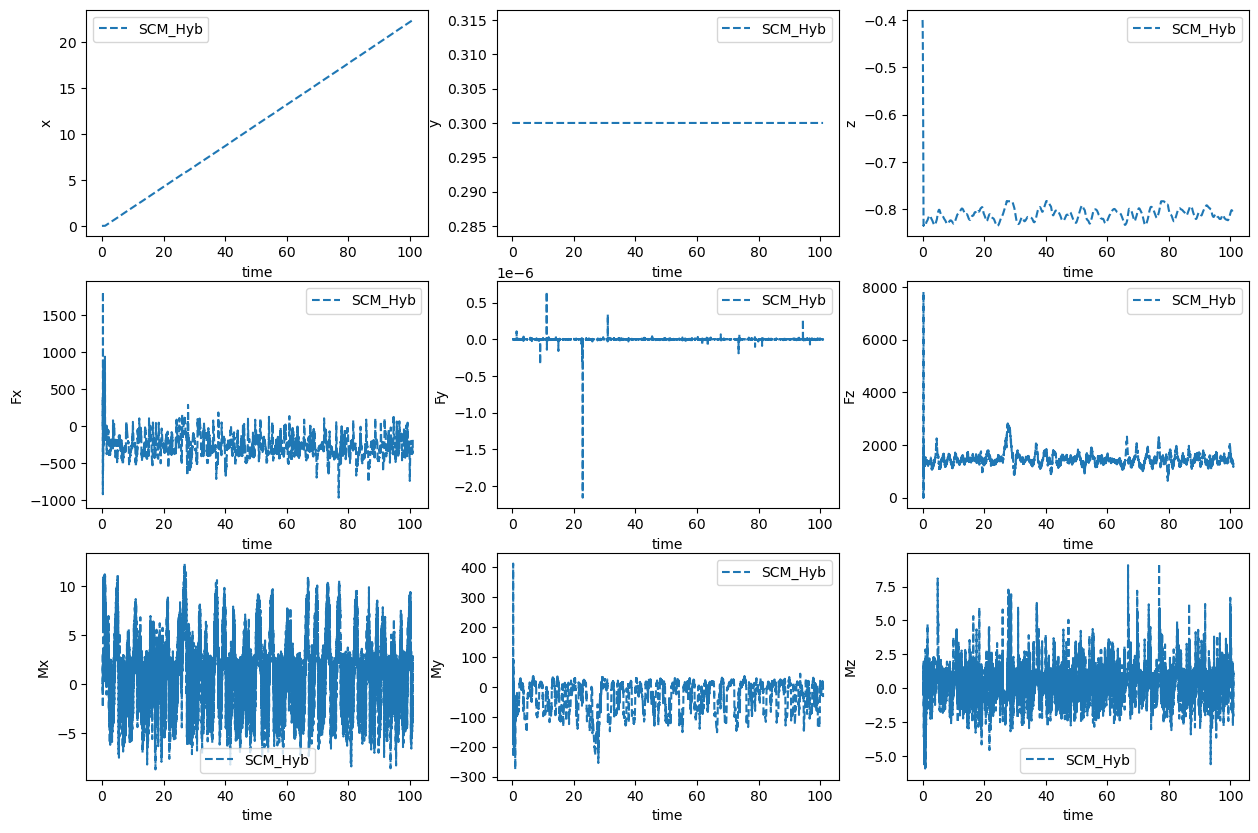

In [ ]:
initX= 23
foldername_Hyb = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

# 
foldername_Hyb_HM = foldername_Hyb[:-1] + '_HMbmp/'
filename_Hyb = foldername_Hyb + 'SCM_force_saved.txt'
filename_Hyb_wheelstate = foldername_Hyb + 'ROVER_states_saved.txt'
filename_Hyb_force = foldername_Hyb + 'SCM_force_saved.txt'
data_Hyb_wheelstate = np.loadtxt(filename_Hyb_wheelstate)
data_Hyb_force = np.loadtxt(filename_Hyb_force)

# plot the data with respect to time as subplot
F_list = ['x','y','z','Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']
fig, ax = plt.subplots(3, 3, figsize=(5*3, 10))
for iax in range(len(F_list)):
    # ax[iax//3, iax%3].plot(data_SCM_force[:, 0], data_SCM_force[:, iax+1], label='SCM')
    ax[iax//3, iax%3].plot(data_Hyb_force[:, 0], data_Hyb_force[:, iax+1], label='SCM_Hyb',linestyle='--')
    # ax[iax//3, iax%3].plot(data_SCM_Hyb_0TerrF[:, 0], data_SCM_Hyb_0TerrF[:, iax+1], label='SCM_Hyb_0TerrF',linestyle=':')
    ax[iax//3, iax%3].set_xlabel('time')
    ax[iax//3, iax%3].set_ylabel(F_list[iax])
    ax[iax//3, iax%3].legend()


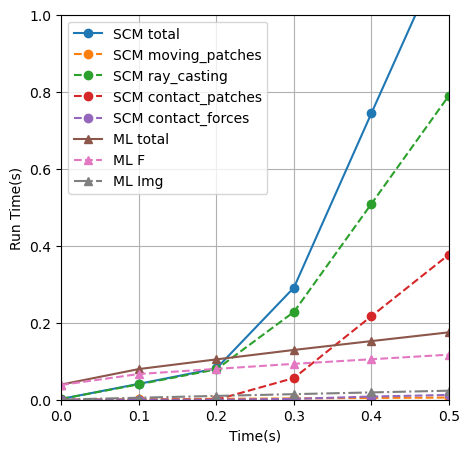

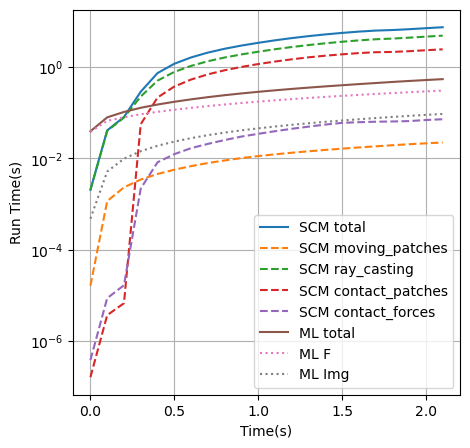

In [15]:
filaname_profling = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_runTime/data_profiling_dt0.1.txt'
# ML: Total time, F time, Img time
# SCM: Total time, moving_patches, ray_casting, contact_patches. contact_forces

data_profiling = np.loadtxt(filaname_profling, delimiter=',')
data_SCM = data_profiling[1::2,:]
data_ML = data_profiling[0::2,:]
# plot the data with respect to time as subplot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(data_SCM[:, 0], data_SCM[:, 1]*1e-3, label='SCM total', marker='o')
# ax.plot(data_SCM[:, 0], (data_SCM[:, 2]+data_SCM[:, 3]+data_SCM[:, 4])*1e-3, label='SCM all geometry', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 2])*1e-3, label='SCM moving_patches', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 3])*1e-3, label='SCM ray_casting', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 4])*1e-3, label='SCM contact_patches', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 5])*1e-3, label='SCM contact_forces', marker='o', linestyle='--')
ax.plot(data_ML[:, 0], data_ML[:, 1]*1e-3, label='ML total', marker='^')
ax.plot(data_ML[:, 0], data_ML[:, 2]*1e-3, label='ML F', marker='^', linestyle='--')
ax.plot(data_ML[:, 0], data_ML[:, 3]*1e-3, label='ML Img', marker='^', linestyle='-.')
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Run Time(s)')
ax.legend()
ax.grid()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(data_SCM[:, 0], data_SCM[:, 1]*1e-3, label='SCM total',)
# ax.plot(data_SCM[:, 0], (data_SCM[:, 2]+data_SCM[:, 3]+data_SCM[:, 4])*1e-3, label='SCM all geometry', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 2])*1e-3, label='SCM moving_patches', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 3])*1e-3, label='SCM ray_casting', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 4])*1e-3, label='SCM contact_patches', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 5])*1e-3, label='SCM contact_forces', linestyle='--')
ax.plot(data_ML[:, 0], data_ML[:, 1]*1e-3, label='ML total')
ax.plot(data_ML[:, 0], data_ML[:, 2]*1e-3, label='ML F', linestyle=':')
ax.plot(data_ML[:, 0], data_ML[:, 3]*1e-3, label='ML Img', linestyle=':')
# ax.set_xlim(0, 0.5)
# ax.set_ylim(0, 1)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Run Time(s)')
ax.legend()
ax.grid()
# y log scale
ax.set_yscale('log')
plt.show()


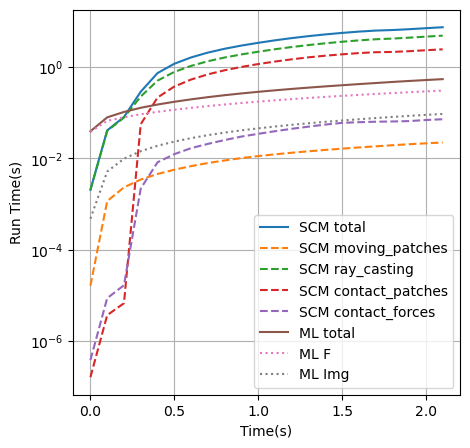

In [ ]:
filaname_profling = '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_runTime/data_profiling_dt0.1.txt'
# ML: Total time, F time, Img time
# SCM: Total time, moving_patches, ray_casting, contact_patches. contact_forces

data_profiling = np.loadtxt(filaname_profling, delimiter=',')
data_SCM = data_profiling[1::2,:]
data_ML = data_profiling[0::2,:]

# # plot the data with respect to time as subplot
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax.plot(data_SCM[:, 0], data_SCM[:, 1]*1e-3, label='SCM total', marker='o')
# # ax.plot(data_SCM[:, 0], (data_SCM[:, 2]+data_SCM[:, 3]+data_SCM[:, 4])*1e-3, label='SCM all geometry', marker='o', linestyle='--')
# ax.plot(data_SCM[:, 0], (data_SCM[:, 2])*1e-3, label='SCM moving_patches', marker='o', linestyle='--')
# ax.plot(data_SCM[:, 0], (data_SCM[:, 3])*1e-3, label='SCM ray_casting', marker='o', linestyle='--')
# ax.plot(data_SCM[:, 0], (data_SCM[:, 4])*1e-3, label='SCM contact_patches', marker='o', linestyle='--')
# ax.plot(data_SCM[:, 0], (data_SCM[:, 5])*1e-3, label='SCM contact_forces', marker='o', linestyle='--')
# ax.plot(data_ML[:, 0], data_ML[:, 1]*1e-3, label='ML total', marker='^')
# ax.plot(data_ML[:, 0], data_ML[:, 2]*1e-3, label='ML F', marker='^', linestyle='--')
# ax.plot(data_ML[:, 0], data_ML[:, 3]*1e-3, label='ML Img', marker='^', linestyle='-.')
# ax.set_xlim(0, 0.5)
# ax.set_ylim(0, 1)
# ax.set_xlabel('Time(s)')
# ax.set_ylabel('Run Time(s)')
# ax.legend()
# ax.grid()
# plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(data_SCM[:, 0], data_SCM[:, 1]*1e-3, label='SCM total',)
# ax.plot(data_SCM[:, 0], (data_SCM[:, 2]+data_SCM[:, 3]+data_SCM[:, 4])*1e-3, label='SCM all geometry', marker='o', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 2])*1e-3, label='SCM moving_patches', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 3])*1e-3, label='SCM ray_casting', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 4])*1e-3, label='SCM contact_patches', linestyle='--')
ax.plot(data_SCM[:, 0], (data_SCM[:, 5])*1e-3, label='SCM contact_forces', linestyle='--')
ax.plot(data_ML[:, 0], data_ML[:, 1]*1e-3, label='ML total')
ax.plot(data_ML[:, 0], data_ML[:, 2]*1e-3, label='ML F', linestyle=':')
ax.plot(data_ML[:, 0], data_ML[:, 3]*1e-3, label='ML Img', linestyle=':')
# ax.set_xlim(0, 0.5)
# ax.set_ylim(0, 1)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Run Time(s)')
ax.legend()
ax.grid()
# y log scale
ax.set_yscale('log')
plt.show()
